In [3]:
import scanpy as sc
import numpy as np
import scipy.sparse as sp
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
#adata = sc.read_h5ad("complete_tumor_raw.h5ad")

In [5]:
df = pd.read_csv("NSCLC_integrated_metadata.csv")
df

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient_long,patient,...,celltype_iced_main,celltype_iced_fine,celltype_hpca_main,celltype_hpca_fine,celltype_mid_main,celltype_mid_fine,tumor_nontumor_minor,integrated_snn_res.0.5,STK11mutvsNonSTK11mut,PRIMARYvsBRAIN_METSvsCHEST_WALL_MET
0,PA001_GATTCAGAGTCAAGCG-1,PA001,39138,8976,0.413920,0.337268,0.242731,0.579999,nsclpa001_5p,nsclpa001_5p,...,B cells,"T cells, CD4+, Th1_17",Epithelial_cells,Epithelial_cells:bronchial,Progenitors,Progenitor cells,Cancer cells,8,Non-STK11-mut,BRAIN_METS
1,PA001_TATCAGGCAGGTCTCG-1,PA001,35445,8841,0.507829,0.273663,0.208774,0.482438,nsclpa001_5p,nsclpa001_5p,...,B cells,"B cells, naive",Neurons,Neuroepithelial_cell:ESC-derived,CD8+ T cells,Effector memory CD8 T cells,Cancer cells,5,Non-STK11-mut,BRAIN_METS
2,PA001_GGGTCTGCATTGGTAC-1,PA001,32147,8664,0.796342,0.289296,0.267521,0.556817,nsclpa001_5p,nsclpa001_5p,...,B cells,"B cells, naive",Embryonic_stem_cells,Astrocyte:Embryonic_stem_cell-derived,Progenitors,Progenitor cells,Cancer cells,0,Non-STK11-mut,BRAIN_METS
3,PA001_AGAATAGGTTGAGGTG-1,PA001,30438,8200,0.331822,0.220120,0.197122,0.417242,nsclpa001_5p,nsclpa001_5p,...,B cells,"B cells, naive",Astrocyte,Astrocyte:Embryonic_stem_cell-derived,Progenitors,Plasmablasts,Cancer cells,5,Non-STK11-mut,BRAIN_METS
4,PA001_TGCGGGTCAGACGTAG-1,PA001,29796,8104,0.567190,0.338972,0.248355,0.587327,nsclpa001_5p,nsclpa001_5p,...,B cells,"B cells, naive",Epithelial_cells,Epithelial_cells:bronchial,CD4+ T cells,Th17 cells,Cancer cells,8,Non-STK11-mut,BRAIN_METS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278535,STK_1_AACTCTTAGTGTGGCA-1,STK_1,806,651,6.575682,3.349876,5.459057,8.808933,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,...,B cells,"T cells, CD4+, Th17",Epithelial_cells,Epithelial_cells:bronchial,CD4+ T cells,Plasmablasts,Cancer cells,2,STK11-mut,BRAIN_METS
278536,STK_1_GTCATTTCAATAGCAA-1,STK_1,802,601,3.366584,0.748130,0.997506,1.745636,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,...,Monocytes,"Monocytes, CD16+",Macrophage,Macrophage:monocyte-derived:IL-4/Dex/TGFb,Monocytes,Non classical monocytes,T cells,3,STK11-mut,BRAIN_METS
278537,STK_1_TCAGGATGTTCCACAA-1,STK_1,808,604,7.054455,2.227723,2.846535,5.074257,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,...,Monocytes,"Monocytes, CD16+",Astrocyte,Astrocyte:Embryonic_stem_cell-derived,NaN,Intermediate monocytes,CNS,19,STK11-mut,BRAIN_METS
278538,STK_1_TGACAACAGAGGTTGC-1,STK_1,803,628,3.611457,3.611457,7.471980,11.083437,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,...,Monocytes,"Monocytes, CD16+",Macrophage,Macrophage:monocyte-derived:IL-4/Dex/cntrl,Monocytes,Intermediate monocytes,T cells,3,STK11-mut,BRAIN_METS


In [14]:
df['condition'] = df['PRIMARYvsBRAIN_METSvsCHEST_WALL_MET']
df[df["condition"].isin(["BRAIN_METS", "PRIMARY"])]

df["merge"]  = df["tumor_nontumor_minor"] + " " + df["patient_long"]
df = df.groupby('merge', group_keys=False).apply(lambda x: x.sample(frac=0.25))
df.to_csv("sampled_metadata.csv")

In [9]:
set(df["patient"])

{'NSCL-PA004-5p-GEX',
 'NSCL-PA005-5p-GEX',
 'NSCL-PA019-5p-GEX',
 'NSCL-PA067-5p-GEX',
 'NSCL-PA076-5p-GEX',
 'NSCL-PA080-5p-GEX',
 'NSCL-PA104-5p-GEX',
 'NSCL-PA141-5p-GEX',
 'NSCLC_KRAS_10',
 'NSCLC_KRAS_11',
 'NSCLC_KRAS_12',
 'NSCLC_KRAS_13',
 'NSCLC_KRAS_22dot2',
 'NSCLC_STK_14',
 'NSCLC_STK_15',
 'NSCLC_STK_18',
 'NSCLC_STK_2',
 'NSCLC_STK_20',
 'NSCLC_STK_21',
 'NSCLC_STK_3',
 'NSCLC_STK_5dot1',
 'NSCLC_STK_5dot2',
 nan,
 'nsclc_kras_17_5pv2_S23_L003',
 'nsclc_kras_4_5pv2_S20_L003',
 'nsclc_kras_6_5pv2_S21_L003',
 'nsclc_kras_7_5pv2_S24_L003',
 'nsclc_kras_8_5pv2_S22_L003',
 'nsclc_stk_1_5pv2_S25_L003',
 'nsclpa001_5p',
 'nsclpa025_5p-GEX',
 'nsclpa034_5p-GEX',
 'nsclpa042_5p',
 'nsclpa043_5p-GEX',
 'nsclpa048_5p-GEX',
 'nsclpa054_5p-GEX',
 'nsclpa056_5p-GEX',
 'nsclpa060_5p-GEX',
 'nsclpa068_5p',
 'nsclpa070_5p',
 'nsclpa072_5p',
 'nsclpa125_5p'}

In [19]:
adata = sc.read_h5ad("complete_tumor_raw.h5ad")

In [22]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.rps,percent.rpl,percent.rp,patient_long,patient,predicted_doublets,...,sequencing,RNA_snn_res.0.8,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,cell_type_fine
Tumor_PA001_GCGAGAAGTACTTAGC-1,PA001,20491.0,6976,0.590503,0.214728,0.175687,0.390415,nsclpa001_5p,nsclpa001_5p,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_PA001_TCGGTAAAGGCAAAGA-1,PA001,18659.0,5631,1.045072,0.117906,0.123265,0.241170,nsclpa001_5p,nsclpa001_5p,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_PA001_CTCTAATCATGAGCGA-1,PA001,17974.0,5562,0.867920,0.139090,0.127963,0.267052,nsclpa001_5p,nsclpa001_5p,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_PA001_CTTTGCGAGACTGTAA-1,PA001,11223.0,4085,1.603849,0.115834,0.115834,0.231667,nsclpa001_5p,nsclpa001_5p,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_PA001_GTTACAGTCCAGAGGA-1,PA001,9885.0,4203,1.406171,0.060698,0.091047,0.151745,nsclpa001_5p,nsclpa001_5p,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tumor_STK_1_TGTCCCAAGCACCGTC-1,STK_1,823.0,641,7.654921,1.579587,3.159174,4.738761,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_STK_1_GTAACGTTCGCACTCT-1,STK_1,810.0,652,4.567901,2.469136,3.703704,6.172840,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_STK_1_AACTGGTTCAACCAAC-1,STK_1,807.0,669,3.965304,2.354399,3.593556,5.947955,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA
Tumor_STK_1_CTCTGGTTCCTCAATT-1,STK_1,807.0,667,1.858736,1.363073,2.850062,4.213135,nsclc_stk_1_5pv2_S25_L003,nsclc_stk_1_5pv2_S25_L003,0,...,NA,NA,NaN,NaN,2,-2147483648,NaN,NaN,NaN,NA


In [15]:
adata.var

# Check if the counts matrix is already log-transformed
if isinstance(adata.X, sp.spmatrix) and np.all(adata.X.data > 0):
    # Apply log transformation to the counts matrix
    adata.X = np.log1p(adata.X)

else:
    print("Counts matrix appears to be already log-transformed.")

Counts matrix appears to be already log-transformed.


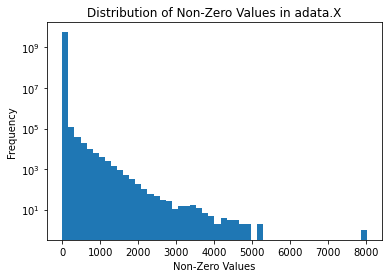

In [18]:
# Ensure that adata.X is a sparse matrix, typically a scipy.sparse.csr_matrix
# Extract the non-zero values from the sparse matrix and convert them to a NumPy array
non_zero_values = adata.X.ravel()


# Create a histogram to visualize the distribution of non-zero values
plt.hist(non_zero_values, bins=50, log=True)  # Use log=True for a logarithmic y-axis
plt.xlabel("Non-Zero Values")
plt.ylabel("Frequency")
plt.title("Distribution of Non-Zero Values in adata.X")
plt.show()


In [ ]:
adata.X